In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Here all data was uploaded to Google colab

In [15]:
from google.colab import files
uploaded = files.upload()

Streaming output truncated to the last 5000 lines.
Saving 2013-01-16_10_25_06_jpg.rf.ff9e552b79acbbff8dcc5fe02e683013X_resized.jpg to 2013-01-16_10_25_06_jpg.rf.ff9e552b79acbbff8dcc5fe02e683013X_resized.jpg
Saving 2013-01-16_10_20_05_jpg.rf.70c2bbe7b3c126408a7fd9b5cf7fbfdbX_resized.jpg to 2013-01-16_10_20_05_jpg.rf.70c2bbe7b3c126408a7fd9b5cf7fbfdbX_resized.jpg
Saving 2013-01-16_10_15_05_jpg.rf.cde933cc38676558f5e9995d38db3df0X_resized.jpg to 2013-01-16_10_15_05_jpg.rf.cde933cc38676558f5e9995d38db3df0X_resized.jpg
Saving 2013-01-16_10_10_05_jpg.rf.0e08b3a4ec083757f2008efeba37cfacX_resized.jpg to 2013-01-16_10_10_05_jpg.rf.0e08b3a4ec083757f2008efeba37cfacX_resized.jpg
Saving 2013-01-16_10_05_05_jpg.rf.9d61ae17e60875275a07f6cc6063b927X_resized.jpg to 2013-01-16_10_05_05_jpg.rf.9d61ae17e60875275a07f6cc6063b927X_resized.jpg
Saving 2013-01-16_09_55_05_jpg.rf.1ba40e73e33fdae87bf66a7e43a5f153X_resized.jpg to 2013-01-16_09_55_05_jpg.rf.1ba40e73e33fdae87bf66a7e43a5f153X_resized.jpg
Saving 2013-0

In [16]:
from os import listdir
from matplotlib import image
from google.colab.patches import cv2_imshow
import cv2 as cv
import numpy as np
import pandas as pd

In [17]:
for k, v in uploaded.items():
  open(k, 'wb').write(v)
img_names = list(uploaded.keys())

loaded_images = []

for img in img_names:
  data = image.imread(img)
  loaded_images.append(data)
  print('> loaded %s %s' % (img, data.shape))

Streaming output truncated to the last 5000 lines.
> loaded 2013-01-16_10_25_06_jpg.rf.ff9e552b79acbbff8dcc5fe02e683013X_resized.jpg (32, 32, 3)
> loaded 2013-01-16_10_20_05_jpg.rf.70c2bbe7b3c126408a7fd9b5cf7fbfdbX_resized.jpg (32, 32, 3)
> loaded 2013-01-16_10_15_05_jpg.rf.cde933cc38676558f5e9995d38db3df0X_resized.jpg (32, 32, 3)
> loaded 2013-01-16_10_10_05_jpg.rf.0e08b3a4ec083757f2008efeba37cfacX_resized.jpg (32, 32, 3)
> loaded 2013-01-16_10_05_05_jpg.rf.9d61ae17e60875275a07f6cc6063b927X_resized.jpg (32, 32, 3)
> loaded 2013-01-16_09_55_05_jpg.rf.1ba40e73e33fdae87bf66a7e43a5f153X_resized.jpg (32, 32, 3)
> loaded 2013-01-16_09_50_05_jpg.rf.9855e6a64d9b5b8b79182e60399d0d5cX_resized.jpg (32, 32, 3)
> loaded 2013-01-16_09_45_05_jpg.rf.b55ea0f9629b4f86edb774d2181403fbX_resized.jpg (32, 32, 3)
> loaded 2013-01-16_09_40_05_jpg.rf.637360ba976411b620b398481d3f3ec8X_resized.jpg (32, 32, 3)
> loaded 2013-01-16_09_35_05_jpg.rf.1680a46c8f35c8523579bff51f99cebfX_resized.jpg (32, 32, 3)
> loaded 

Images were resized prior to beng upload all images are 32 X 32. Preprocessing done :Grey Scale 
and Flatten Data 

In [18]:
trainx = []

for x in loaded_images:
  train_img =cv.cvtColor(x, cv.COLOR_BGR2GRAY)
  train_img=np.array(train_img).flatten()
  trainx.append(train_img)
cv.waitKey(0)
cv.destroyAllWindows()



In [19]:
X = np.array(trainx)
print(X.shape)

(8690, 1024)


In [20]:
from google.colab import files
targetup = files.upload()

Saving Target.csv to Target.csv


In [21]:
Y_t=pd.read_csv('Target.csv')
Y= np.array(Y_t)
print(Y.shape)

(8690, 1)


In [13]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import pandas
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [90]:
class LogisticClassifierGradient:
        
    # fit the model to the data
    def fit(self, X, y, w0, alpha, h, tolerance, maxIterations):
        self.n = X.shape[0]
        self.d = X.shape[1]
        self.h = h
        self.alpha = alpha
        self.initialGuess = w0
        # self.l1=l1;
        # self.l2=l2;
        
        # standardize the data
        X = self.standardize(X)
        
        # save the training data and add a column of 1s to it
        self.data = np.hstack((np.ones([self.n, 1]), X))
        
        # save the training labels
        self.outputs = y
        
        # find the w values that minimize the sum of squared errors via gradient descent
        X = self.data
        print(self.data.shape)
        print(self.outputs.shape)
        L = lambda w: (self.sigmoid((X @ w)).T - y.T) @ (self.sigmoid(X @ w) - y)+ self.l1 *np.sum(np.abs(w)) + self.l2 * w.T @ w
        self.w = self.gradientDescent(L, self.initialGuess, self.alpha, self.h, tolerance, maxIterations)
                
    # predict the output from testing data
    def predict(self, X):        
        # standardize the data
        X = self.standardize(X)
        
        # initialize an empty matrix to store the predicted outputs
        yPredicted = np.empty([X.shape[0],1])
        
        # append a column of ones at the beginning of X
        X = np.hstack((np.ones([X.shape[0],1]), X))
        
        # apply the function f with the values of w from the fit function to each testing datapoint (rows of X)
        for row in range(X.shape[0]):
            yPredicted[row] = np.round(self.sigmoid(self.w.T @ X[row,]))
            
        return yPredicted

    # run gradient descent to minimize the loss function
    def gradientDescent(self, f, x0, alpha, h, tolerance, maxIterations):
        # set x equal to the initial guess
        x = x0
        x=np.array(x0)
        x=np.reshape(x,(len(x),1))
        x = x.astype('float64')
        # take up to maxIterations number of steps
        for counter in range(maxIterations):
            # update the gradient
            # for ele in x:
            #     if abs(ele) < 0.0000000001:
            #         appl= 0
            #     if abs(ele) > 0.0000000001:
            #         appl= x/abs(x)
            gradient = -2* self.data.T @ ((self.outputs - self.sigmoid(self.data @ x)) * (1-self.sigmoid(self.data @ x)* self.sigmoid(self.data @ x)))
            
            # stop if the norm of the gradient is near 0
            if np.linalg.norm(gradient) < tolerance:
                print('Gradient descent took', counter, 'iterations to converge')
                print('The norm of the gradient is', np.linalg.norm(gradient))
                # return the approximate critical value x
                return x

            # if we do not converge, print a message
            elif counter == maxIterations-1:
                print("Gradient descent failed")
                print('The norm of the gradient is', np.linalg.norm(gradient))
                # return x, sometimes it is still pretty good
                return x

            # take a step in the opposite direction as the gradient
            x -= alpha*gradient
            
   
    
    def sigmoid(self, z): return 1.0 / (1 + np.exp(-z))
    
    def standardize(self, X):
        n = X.shape[0]
        
        # normalize all the n features of X.
        for i in range(n):
            X = (X - X.mean(axis=0))/X.std(axis=0)
        return X

(6517, 1024)
(6517, 1)
(2173, 1024)
(2173, 1)
(6517, 1024)
(6517, 1)
(2173, 1024)
(2173, 1)
(6517, 1025)
(6517, 1)
Gradient descent failed
The norm of the gradient is 97771.07997884034

Train Classification Report:

               precision    recall  f1-score   support

           0       0.16      0.39      0.22       980
           1       0.85      0.62      0.72      5537

    accuracy                           0.59      6517
   macro avg       0.50      0.51      0.47      6517
weighted avg       0.75      0.59      0.65      6517


Test Classification Report:

               precision    recall  f1-score   support

           0       0.16      0.37      0.22       346
           1       0.84      0.62      0.72      1827

    accuracy                           0.58      2173
   macro avg       0.50      0.50      0.47      2173
weighted avg       0.73      0.58      0.64      2173


Test Confusion Matrix:



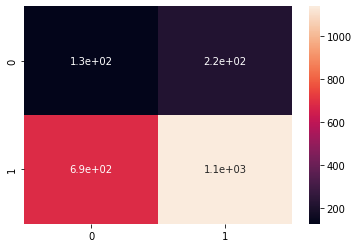

In [97]:
# split the data into train and test sets
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.25)
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)
# build the logistic classifier
trainX = trainX.astype('float32')/255.0
testX = testX.astype('float32')/255.0
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)
# build the Bayes classifier
model = LogisticClassifierGradient()

# fit the Bayes classifier to the training data
#print(trainX.shape,trainY.shape)
model.fit(trainX, trainY, [0] * (X.shape[1] + 1), alpha = 0.0001, h = 0.001,
          tolerance = 0.001, maxIterations = 100)

# predict the labels of the training set
predictedY = model.predict(trainX)

# print quality metrics
print('\nTrain Classification Report:\n\n', classification_report(trainY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

# print quality metrics
print('\nTest Classification Report:\n\n', classification_report(testY, predictedY))
print('\nTest Confusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY), annot = True)

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import warnings
# load some libraries

from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [46]:
class FeedforwardNeuralNetworkSGD:
    
    # input a vector [a, b, c, ...] with the number of nodes in each layer
    def __init__(self, layers, alpha = 0.1, batchSize = 32,activation='sigmoid'):
        # list of weight matrices between layers
        self.W = []
        
        # network architecture will be a vector of numbers of nodes for each layer
        self.layers = layers
        
        # learning rate
        self.alpha = alpha
        
        # batch size
        self.batchSize = batchSize

         # activation type
        self.activation = activation
        
        # initialize the weights (randomly) -- this is our initial guess for gradient descent
        
        # initialize the weights between layers (up to the next-to-last one) as normal random variables
        for i in np.arange(0, len(layers) - 2):
            self.W.append(np.random.randn(layers[i] + 1, layers[i + 1] + 1)/100)
        # initialize weights between the last two layers (we don't want bias for the last one)
        self.W.append(np.random.randn(layers[-2] + 1, layers[-1])/100)
        
    # define the activation function
    def activate(self, x):
        if self.activation == 'sigmoid':
            return 1.0 / (1 + np.exp(-x))

        if self.activation == 'ReLU':
            return x*(x >= 0)
        
        if self.activation == 'ELU':
            return x*(x >= 0) + 0.1*(np.exp(x) - 1)*(x < 0)
    
    # define the activation derivative (where x is the INPUT to activation function)
    def activationDerivative(self, x):
        if self.activation == 'sigmoid':
             return self.activate(x) * (1 - self.activate(x))
        
        if self.activation == 'ReLU':
            return x >= 0
        
        if self.activation == 'ELU':
            return 1*(x >= 0) + 0.1*np.exp(x)*(x < 0)
    
    # get a new mini-batch of data from the dataset
    def getNextBatch(self, X, y, batchSize):
        for i in np.arange(0, X.shape[0], batchSize):
            # yield returns a generator, which can continue where it left off on later calls
            # of the function
            yield (X[i:i + batchSize], y[i:i + batchSize])
    
    # fit the model
    def fit(self, X, y, epochs = 10000, update = 1000):
        # add a column of ones to the end of X
        X = np.hstack((X, np.ones([X.shape[0],1])))
        #print(X.shape)
        for epoch in range(epochs):
            
            # randomize the examples
            p = np.arange(0, X.shape[0])
            np.random.shuffle(p)
            X = X[p]
            #print("This is X after P",X.shape)
            y = y[p]

            # feed forward, backprop, and weight update
            for (x, target) in self.getNextBatch(X, y, self.batchSize):
                
                # make a list of output activations from the first layer
                # (just the original x values)
                A = [np.atleast_2d(x)]
                Z = [np.atleast_2d(x)]
                # feed forward
                # print("this is a[0]\n",A[0])
                # print("this is w[0]\n",self.W[0])
                for layer in range(len(self.W)):
                    # print("this is layer ",layer)
                    # print("This is A[layer\n",A[layer])
                    #print(self.W[layer])
                    # feed through one layer and apply sigmoid activation
                    net = A[layer].dot(self.W[layer])
                    # print("thei is net at \n",layer)
                    # print(net)
                    out = self.activate(net)
                    # print("thei is out at \n",layer)
                    # print(out)
                    
                    # add our network output to the list of activations
                    A.append(out)
                    Z.append(net)
                # backpropagation (coming soon!)
                error = A[-1] - target
                
                D = [error * self.activationDerivative(Z[-1])]
                
                # loop backwards over the layers to build up deltas
                for layer in np.arange(len(A) - 2, 0, -1):
                    delta = D[-1].dot(self.W[layer].T)
                    delta = delta * self.activationDerivative(Z[layer])
                    D.append(delta)
                    
                # reverse the deltas since we looped in reverse
                D = D[::-1]
                
                # weight update in each layer
                for layer in range(len(self.W)):
                    self.W[layer] -= self.alpha * A[layer].T.dot(D[layer])
                    
            # print an 
            if (epoch + 1) % update == 0:
                loss = self.computeLoss(X,y)
                print('Epoch =', epoch + 1, '\t loss =', loss)
                
    def predict(self, X, addOnes = True):
        # initialize data, be sure it's the right dimension
        p = np.atleast_2d(X)
        
        # add a column of 1s for bias
        if addOnes:
            p = np.hstack((p, np.ones([X.shape[0],1])))
        
        # feed forward!
        for layer in np.arange(0, len(self.W)):
            p = self.activate(np.dot(p, self.W[layer]))
            
        return p
    
    def computeLoss(self, X, y):
        # initialize data, be sure it's the right dimension
        y = np.atleast_2d(y)
        
        # feed the datapoints through the network to get predicted outputs
        predictions = self.predict(X, addOnes = False)
        loss = np.sum((predictions - y)**2) / 2.0
        
        return loss

In [51]:
# load the full MNIST dataset: both data and labels
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.25)

trainX = trainX.astype('float64')/255.0
testX = testX.astype('float64')/255.0

# reshape the data
trainX = trainX.reshape([6517, 32*32])
testX = testX.reshape([2173, 32*32])

# convert the digits to one-hot vectors
trainY = to_categorical(trainY, 10)
testY = to_categorical(testY, 10)

# fit the model to the training data
model = FeedforwardNeuralNetworkSGD([1024, 32, 16, 10], 0.001, 32, 'sigmoid')
model.fit(trainX, trainY, 100, 1)

# print the classification performance
print("Training set accuracy")
predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)

trainY = trainY.argmax(axis=1)
print(classification_report(trainY, predictedY))

print("Test set accuracy")
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)

testY = testY.argmax(axis=1)
print(classification_report(testY, predictedY))

Epoch = 1 	 loss = 1240.224082695072
Epoch = 2 	 loss = 964.7822779694603
Epoch = 3 	 loss = 912.0875008116966
Epoch = 4 	 loss = 890.9342741261089
Epoch = 5 	 loss = 879.7023169240695
Epoch = 6 	 loss = 872.8081241278967
Epoch = 7 	 loss = 868.1902030928934
Epoch = 8 	 loss = 864.9354726484088
Epoch = 9 	 loss = 862.4267074872122
Epoch = 10 	 loss = 860.5061658973932
Epoch = 11 	 loss = 859.0370203771027
Epoch = 12 	 loss = 857.740546138072
Epoch = 13 	 loss = 856.7107427492492
Epoch = 14 	 loss = 855.8544626003284
Epoch = 15 	 loss = 855.1029790275794
Epoch = 16 	 loss = 854.4937153825327
Epoch = 17 	 loss = 853.9078151862661
Epoch = 18 	 loss = 853.4174121753094
Epoch = 19 	 loss = 852.9830354047617
Epoch = 20 	 loss = 852.6099969282802
Epoch = 21 	 loss = 852.2597900881494
Epoch = 22 	 loss = 851.9346180695557
Epoch = 23 	 loss = 851.6578298132806
Epoch = 24 	 loss = 851.464380631003
Epoch = 25 	 loss = 851.1550921681038
Epoch = 26 	 loss = 850.9396853756393
Epoch = 27 	 loss = 850

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


This is wiht hyperparameters

In [93]:
class FeedforwardNeuralNetworkSGD:
    
    # input a vector [a, b, c, ...] with the number of nodes in each layer
    def __init__(self, layers, alpha = 0.1, batchSize = 32,activation='sigmoid',loss='cross-entropy',lambda1 = 0, lambda2 = 0):
        # list of weight matrices between layers
        self.W = []
        
        # network architecture will be a vector of numbers of nodes for each layer
        self.layers = layers
        
        # learning rate
        self.alpha = alpha
        
         # L1 penalty coefficient
        self.lambda1 = lambda1
        
        # L2 penalty coefficient
        self.lambda2 = lambda2
        
        # batch size
        self.batchSize = batchSize

         # activation type
        self.activation = activation
        #loss function 
        self.loss = loss

        
        
        # initialize the weights (randomly) -- this is our initial guess for gradient descent
        
        # initialize the weights between layers (up to the next-to-last one) as normal random variables
        for i in np.arange(0, len(layers) - 2):
            self.W.append(np.random.randn(layers[i] + 1, layers[i + 1] + 1)/100.0)
            
        # initialize weights between the last two layers (we don't want bias for the last one)
        self.W.append(np.random.randn(layers[-2] + 1, layers[-1])/100.0)
        
    # define the sigmoid activation
    #def sigmoid(self, x):
        #return 1.0 / (1 + np.exp(-x))
    
    # define the sigmoid derivative (where z is the output of a sigmoid)
    #def sigmoidDerivative(self, z):
        #return z * (1 - z)

            
    # define the activation function
    def activate(self, x):
        if self.activation == 'sigmoid':
            return 1.0 / (1 + np.exp(-x))

        if self.activation == 'ReLU':
            return x*(x >= 0)
        
        if self.activation == 'ELU':
            return x*(x >= 0) + 0.1*(np.exp(x) - 1)*(x < 0)
    
    # define the activation derivative (where x is the INPUT to activation function)
    def activationDerivative(self, x):
        if self.activation == 'sigmoid':
             return self.activate(x) * (1 - self.activate(x))
        
        if self.activation == 'ReLU':
            return x >= 0
        
        if self.activation == 'ELU':
            return 1*(x >= 0) + 0.1*np.exp(x)*(x < 0)
    
    # get a new mini-batch of data from the dataset
    def getNextBatch(self, X, y, batchSize):
        for i in np.arange(0, X.shape[0], batchSize):
            # yield returns a generator, which can continue where it left off on later calls
            # of the function
            yield (X[i:i + batchSize], y[i:i + batchSize])
    
    # fit the model
    def fit(self, X, y, epochs = 10000, update = 1000):
        # add a column of ones to the end of X
        X = np.hstack((X, np.ones([X.shape[0],1])))

        numberOfExamples = X.shape[0]

        for epoch in range(epochs):
            
            # randomize the examples
            p = np.arange(0, X.shape[0])
            np.random.shuffle(p)
            X = X[p]
            y = y[p]

            # feed forward, backprop, and weight update
            for (x, target) in self.getNextBatch(X, y, self.batchSize):
                
                # make a list of output activations from the first layer
                # (just the original x values)
                A = [np.atleast_2d(x)]
                Z = [np.atleast_2d(x)]
                # feed forward
                for layer in range(len(self.W)):
                    
                    # feed through one layer and apply sigmoid activation
                    net = A[layer].dot(self.W[layer])
                    out = self.activate(net)
                    
                    # add our network output to the list of activations
                    A.append(out)
                    Z.append(net)
                # backpropagation (coming soon!)
                error = A[-1] - target

                if self.loss == 'sum-of-squares':
                    D = [error * self.activationDerivative(A[-1])]
                    
                if self.loss == 'cross-entropy':
                    D = [error]
                #print(error.shape)
                #D = [error * self.activationDerivative(Z[-1])]
                #cross entrpy
                #D = [error]
                # loop backwards over the layers to build up deltas
                for layer in np.arange(len(A) - 2, 0, -1):
                    delta = D[-1].dot(self.W[layer].T)
                    delta = delta * self.activationDerivative(Z[layer])
                    D.append(delta)
                    
                # reverse the deltas since we looped in reverse
                D = D[::-1]
                
                # weight update in each layer
                for layer in range(len(self.W)):
                    self.W[layer] -= self.alpha * (A[layer].T.dot(D[layer])
                                                   + 2 * (self.lambda2 / numberOfExamples) * self.W[layer]
                                                   + (self.lambda1 / numberOfExamples) * np.sign(self.W[layer])*self.W[layer])
              
            # print an 
            if (epoch + 1) % update == 0:
                loss = self.computeLoss(X,y)
                print('Epoch =', epoch + 1, '\t loss =', loss)
                
    def predict(self, X, addOnes = True):
        # initialize data, be sure it's the right dimension
        p = np.atleast_2d(X)
        
        # add a column of 1s for bias
        if addOnes:
            p = np.hstack((p, np.ones([X.shape[0],1])))
        
        # feed forward!
        for layer in np.arange(0, len(self.W)):
            p = self.activate(np.dot(p, self.W[layer]))
            
        return p
    
    def computeLoss(self, X, y):
        # initialize data, be sure it's the right dimension
        y = np.atleast_2d(y)
        
        # feed the datapoints through the network to get predicted outputs
        predictions = self.predict(X, addOnes = False)
        #loss = np.sum((predictions - y)**2) / 2.0
        #cross entropy
        # if the loss function is sum of squares, compute it
        if self.loss == 'sum-of-squares':
            loss = np.sum((predictions - y)**2) / 2.0
            
        # if the loss function is cross-entropy, compute it
        if self.loss == 'cross-entropy':
            loss = np.sum(np.nan_to_num(-y * np.log(predictions) - (1 - y) * np.log(1 - predictions)))
        
        #loss = np.sum(np.nan_to_num(-y * np.log(predictions) - (1 - y) * np.log(1 - predictions)))
        if self.lambda1 != 0:
            # compute the L1 penalty 
            L1penalty = 0

            for layer in np.arange(0,len(self.W)):
                L1penalty += np.sum(np.abs(self.W[layer]))
        
            # add the L1 penalty to the loss
            loss = loss + (self.lambda1 / X.shape[0]) * L1penalty
            
        # if there is an L2 penalty, compute it and add it to the loss
        if self.lambda2 != 0:
            # compute the L2 penalty 
            L2penalty = 0

            for layer in np.arange(0,len(self.W)):
                L2penalty += np.sum(self.W[layer] ** 2)
        
            # add the L2 penalty to the loss
            loss = loss + (self.lambda2 / X.shape[0]) * L2penalty
        
        return loss

In [122]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.25)
#trainX,DevX,trainY,DevY=train_test_split(trainX, trainY, test_size = 0.50)
trainX = trainX.astype('float64')/255.0
testX = testX.astype('float64')/255.0

# # reshape the data
# trainX = trainX.reshape([6517, 32*32])
# testX = testX.reshape([2173, 32*32])

# convert the digits to one-hot vectors
trainY = to_categorical(trainY, 10)
testY = to_categorical(testY, 10)


Tuning Hyperparameters - Chosen Hyperparameters 


1.   Loss Function -Sum of Squares or Cross Entropy
2.   activation Function-ReLU,sigmoid 
1.   Learning Rate-0.001 , 0.01 
 







In [74]:
# fit the model to the training data
model = FeedforwardNeuralNetworkSGD([1024, 32, 16, 10], 0.01, 32,'sigmoid','cross-entropy',0,0)
model.fit(trainX, trainY, 100, 10)

# print the classification performance
print("Training set accuracy")
predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)

trainY = trainY.argmax(axis=1)
print(classification_report(trainY, predictedY))

print("Test set accuracy")
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)

testY = testY.argmax(axis=1)
print(classification_report(testY, predictedY))


Epoch = 10 	 loss = 5561.084646932294
Epoch = 20 	 loss = 5555.3145877231145
Epoch = 30 	 loss = 5545.830494848044
Epoch = 40 	 loss = 5539.163501779549
Epoch = 50 	 loss = 5526.428247840915
Epoch = 60 	 loss = 5523.273489605998
Epoch = 70 	 loss = 5516.336328464705
Epoch = 80 	 loss = 5489.718035103993
Epoch = 90 	 loss = 5481.2767827866155
Epoch = 100 	 loss = 5482.188354654792
Training set accuracy
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       988
           1       0.85      1.00      0.92      5529

    accuracy                           0.85      6517
   macro avg       0.42      0.50      0.46      6517
weighted avg       0.72      0.85      0.78      6517

Test set accuracy
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       338
           1       0.84      1.00      0.92      1835

    accuracy                           0.84      2173
   macro avg       0.42      0.5

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [80]:
# fit the model to the training data
model = FeedforwardNeuralNetworkSGD([1024, 32, 16, 10], 0.001, 32,'sigmoid','cross-entropy',0,0)
model.fit(trainX, trainY, 100, 10)

# print the classification performance
print("Training set accuracy")
predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)

trainY = trainY.argmax(axis=1)
print(classification_report(trainY, predictedY))

print("Test set accuracy")
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)

testY = testY.argmax(axis=1)
print(classification_report(testY, predictedY))


Epoch = 10 	 loss = 5628.720959885474
Epoch = 20 	 loss = 5606.609070930352
Epoch = 30 	 loss = 5598.829004152679
Epoch = 40 	 loss = 5599.171835881793
Epoch = 50 	 loss = 5589.398691372948
Epoch = 60 	 loss = 5599.9421775554965
Epoch = 70 	 loss = 5591.808802172252
Epoch = 80 	 loss = 5586.795122794679
Epoch = 90 	 loss = 5595.891154658642
Epoch = 100 	 loss = 5584.7054704880375
Training set accuracy
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       998
           1       0.85      1.00      0.92      5519

    accuracy                           0.85      6517
   macro avg       0.42      0.50      0.46      6517
weighted avg       0.72      0.85      0.78      6517

Test set accuracy
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       328
           1       0.85      1.00      0.92      1845

    accuracy                           0.85      2173
   macro avg       0.42      0.5

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [98]:
# fit the model to the training data
model = FeedforwardNeuralNetworkSGD([1024, 32, 16, 10], 0.01, 32,'sigmoid','sum-of-squares',0,0)
model.fit(trainX, trainY, 100, 10)

# print the classification performance
print("Training set accuracy")
predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)

trainY = trainY.argmax(axis=1)
print(classification_report(trainY, predictedY))

print("Test set accuracy")
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)

testY = testY.argmax(axis=1)
print(classification_report(testY, predictedY))


Epoch = 10 	 loss = 840.3180921891949
Epoch = 20 	 loss = 840.2022093657348
Epoch = 30 	 loss = 842.4211358677151
Epoch = 40 	 loss = 839.0524107718901
Epoch = 50 	 loss = 839.5350579746307
Epoch = 60 	 loss = 839.3312294330254
Epoch = 70 	 loss = 838.9187106563244
Epoch = 80 	 loss = 845.1208198020103
Epoch = 90 	 loss = 838.9453241523527
Epoch = 100 	 loss = 842.1256737913436
Training set accuracy
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       989
           1       0.85      1.00      0.92      5528

    accuracy                           0.85      6517
   macro avg       0.42      0.50      0.46      6517
weighted avg       0.72      0.85      0.78      6517

Test set accuracy
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       337
           1       0.84      1.00      0.92      1836

    accuracy                           0.84      2173
   macro avg       0.42      0.50 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [101]:
# fit the model to the training data
model = FeedforwardNeuralNetworkSGD([1024, 32, 16, 10], 0.001, 32,'sigmoid','sum-of-squares',0,0)
model.fit(trainX, trainY, 100, 10)

# print the classification performance
print("Training set accuracy")
predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)

trainY = trainY.argmax(axis=1)
print(classification_report(trainY, predictedY))

print("Test set accuracy")
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)

testY = testY.argmax(axis=1)
print(classification_report(testY, predictedY))


Epoch = 10 	 loss = 835.1489668918858
Epoch = 20 	 loss = 834.818696618797
Epoch = 30 	 loss = 834.7653800840944
Epoch = 40 	 loss = 834.8266305600205
Epoch = 50 	 loss = 834.7398708875538
Epoch = 60 	 loss = 834.777381251633
Epoch = 70 	 loss = 834.7650642564641
Epoch = 80 	 loss = 834.7338008603708
Epoch = 90 	 loss = 834.7264085886372
Epoch = 100 	 loss = 834.734968372298
Training set accuracy
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       983
           1       0.85      1.00      0.92      5534

    accuracy                           0.85      6517
   macro avg       0.42      0.50      0.46      6517
weighted avg       0.72      0.85      0.78      6517

Test set accuracy
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       343
           1       0.84      1.00      0.91      1830

    accuracy                           0.84      2173
   macro avg       0.42      0.50    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [103]:
# fit the model to the training data
model = FeedforwardNeuralNetworkSGD([1024, 32, 16, 10], 0.001, 32,'ReLU','sum-of-squares',0,0)
model.fit(trainX, trainY, 100, 10)

# print the classification performance
print("Training set accuracy")
predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)

trainY = trainY.argmax(axis=1)
print(classification_report(trainY, predictedY))

print("Test set accuracy")
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)

testY = testY.argmax(axis=1)
print(classification_report(testY, predictedY))


Epoch = 10 	 loss = 904.8764878077928
Epoch = 20 	 loss = 865.5980392102513
Epoch = 30 	 loss = 893.2996711848843
Epoch = 40 	 loss = 867.808276363464
Epoch = 50 	 loss = 853.613021811521
Epoch = 60 	 loss = 851.1631002358471
Epoch = 70 	 loss = 852.6373001341469
Epoch = 80 	 loss = 868.6943319349931
Epoch = 90 	 loss = 848.8042684601987
Epoch = 100 	 loss = 853.5934945197731
Training set accuracy
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1016
           1       0.84      1.00      0.92      5501

    accuracy                           0.84      6517
   macro avg       0.42      0.50      0.46      6517
weighted avg       0.71      0.84      0.77      6517

Test set accuracy
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       310
           1       0.86      1.00      0.92      1863

    accuracy                           0.86      2173
   macro avg       0.43      0.50   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [105]:
# fit the model to the training data
model = FeedforwardNeuralNetworkSGD([1024, 32, 16, 10], 0.01, 32,'ReLU','sum-of-squares',0,0)
model.fit(trainX, trainY, 100, 10)

# print the classification performance
print("Training set accuracy")
predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)

trainY = trainY.argmax(axis=1)
print(classification_report(trainY, predictedY))

print("Test set accuracy")
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)

testY = testY.argmax(axis=1)
print(classification_report(testY, predictedY))


Epoch = 10 	 loss = 3258.4999779685913
Epoch = 20 	 loss = 3258.499984305499
Epoch = 30 	 loss = 3258.4999865001587
Epoch = 40 	 loss = 3258.499985756622
Epoch = 50 	 loss = 3258.499984958718
Epoch = 60 	 loss = 3258.4999841042654
Epoch = 70 	 loss = 3258.4999842417133
Epoch = 80 	 loss = 3258.499982313573
Epoch = 90 	 loss = 3258.4999823704666
Epoch = 100 	 loss = 3258.4999814036178
Training set accuracy
              precision    recall  f1-score   support

           0       0.15      1.00      0.26       990
           1       0.00      0.00      0.00      5527
           6       0.00      0.00      0.00         0

    accuracy                           0.15      6517
   macro avg       0.05      0.33      0.09      6517
weighted avg       0.02      0.15      0.04      6517

Test set accuracy
              precision    recall  f1-score   support

           0       0.15      1.00      0.27       336
           1       0.00      0.00      0.00      1837
           3       0.00      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [108]:
# fit the model to the training data
model = FeedforwardNeuralNetworkSGD([1024, 32, 16, 10], 0.01, 32,'ReLU','cross-entropy',0,0)
model.fit(trainX, trainY, 100, 10)

# print the classification performance
print("Training set accuracy")
predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)

trainY = trainY.argmax(axis=1)
print(classification_report(trainY, predictedY))

print("Test set accuracy")
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)

testY = testY.argmax(axis=1)
print(classification_report(testY, predictedY))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:169: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:169: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Epoch = 10 	 loss = inf
Epoch = 20 	 loss = inf
Epoch = 30 	 loss = inf
Epoch = 40 	 loss = inf
Epoch = 50 	 loss = inf


KeyboardInterrupt: ignored

In [110]:
# fit the model to the training data
model = FeedforwardNeuralNetworkSGD([1024, 32, 16, 10], 0.001, 32,'ReLU','cross-entropy',0,0)
model.fit(trainX, trainY, 100, 10)

# print the classification performance
print("Training set accuracy")
predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)

trainY = trainY.argmax(axis=1)
print(classification_report(trainY, predictedY))

print("Test set accuracy")
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)

testY = testY.argmax(axis=1)
print(classification_report(testY, predictedY))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:169: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:169: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:169: RuntimeWarning: invalid value encountered in log


Epoch = 10 	 loss = 5627.625366703091
Epoch = 20 	 loss = 5639.110173111158
Epoch = 30 	 loss = 5599.228878645306
Epoch = 40 	 loss = 5644.707867779407
Epoch = 50 	 loss = 5668.306709981213
Epoch = 60 	 loss = 5599.442436348381
Epoch = 70 	 loss = 5553.477473034305
Epoch = 80 	 loss = 5921.6990714517715
Epoch = 90 	 loss = 5507.72259690173
Epoch = 100 	 loss = 5500.611380248721
Training set accuracy
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1001
           1       0.85      1.00      0.92      5516

    accuracy                           0.85      6517
   macro avg       0.42      0.50      0.46      6517
weighted avg       0.72      0.85      0.78      6517

Test set accuracy
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       325
           1       0.85      1.00      0.92      1848

    accuracy                           0.85      2173
   macro avg       0.43      0.50 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [113]:
# fit the model to the training data
model = FeedforwardNeuralNetworkSGD([1024, 32, 16, 10], 0.01, 32,'ELU','sum-of-squares',0,0)
model.fit(trainX, trainY, 100, 10)

# print the classification performance
print("Training set accuracy")
predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)

trainY = trainY.argmax(axis=1)
print(classification_report(trainY, predictedY))

print("Test set accuracy")
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)

testY = testY.argmax(axis=1)
print(classification_report(testY, predictedY))


Epoch = 10 	 loss = 844.1290673952619
Epoch = 20 	 loss = 843.4001624963039
Epoch = 30 	 loss = 845.724786076631
Epoch = 40 	 loss = 841.6640575078942
Epoch = 50 	 loss = 841.3644413987311
Epoch = 60 	 loss = 841.0325550692442
Epoch = 70 	 loss = 834.4883359790367
Epoch = 80 	 loss = 835.3630743379258
Epoch = 90 	 loss = 826.2836883053017
Epoch = 100 	 loss = 829.6041100004222
Training set accuracy
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       995
           1       0.85      1.00      0.92      5522

    accuracy                           0.85      6517
   macro avg       0.42      0.50      0.46      6517
weighted avg       0.72      0.85      0.78      6517

Test set accuracy
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       331
           1       0.85      1.00      0.92      1842

    accuracy                           0.85      2173
   macro avg       0.42      0.50  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [116]:
# fit the model to the training data
model = FeedforwardNeuralNetworkSGD([1024, 32, 16, 10], 0.001, 32,'ELU','sum-of-squares',0,0)
model.fit(trainX, trainY, 100, 10)

# print the classification performance
print("Training set accuracy")
predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)

trainY = trainY.argmax(axis=1)
print(classification_report(trainY, predictedY))

print("Test set accuracy")
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)

testY = testY.argmax(axis=1)
print(classification_report(testY, predictedY))


Epoch = 10 	 loss = 849.1228320646128
Epoch = 20 	 loss = 838.6950905369483
Epoch = 30 	 loss = 842.6389483052352
Epoch = 40 	 loss = 827.86166340066
Epoch = 50 	 loss = 834.2481979314106
Epoch = 60 	 loss = 830.162247887567
Epoch = 70 	 loss = 844.0585682127858
Epoch = 80 	 loss = 826.964083161483
Epoch = 90 	 loss = 823.4909106659187
Epoch = 100 	 loss = 822.4676390751309
Training set accuracy
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       973
           1       0.85      1.00      0.92      5544

    accuracy                           0.85      6517
   macro avg       0.43      0.50      0.46      6517
weighted avg       0.72      0.85      0.78      6517

Test set accuracy
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       353
           1       0.84      1.00      0.91      1820

    accuracy                           0.84      2173
   macro avg       0.42      0.50     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [118]:
# fit the model to the training data
model = FeedforwardNeuralNetworkSGD([1024, 32, 16, 10], 0.01, 32,'ELU','cross-entropy',0,0)
model.fit(trainX, trainY, 100, 10)

# print the classification performance
print("Training set accuracy")
predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)

trainY = trainY.argmax(axis=1)
print(classification_report(trainY, predictedY))

print("Test set accuracy")
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)

testY = testY.argmax(axis=1)
print(classification_report(testY, predictedY))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:169: RuntimeWarning: invalid value encountered in log


Epoch = 10 	 loss = 5527.222673195651
Epoch = 20 	 loss = 5530.549685805159
Epoch = 30 	 loss = 5522.618664725958
Epoch = 40 	 loss = 5522.50842396413
Epoch = 50 	 loss = 5528.260626245665
Epoch = 60 	 loss = 5524.222415335259
Epoch = 70 	 loss = 5523.447273294275
Epoch = 80 	 loss = 5533.154782456192
Epoch = 90 	 loss = 5525.988810528858
Epoch = 100 	 loss = 5522.7366138919615
Training set accuracy
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       981
           1       0.85      1.00      0.92      5536

    accuracy                           0.85      6517
   macro avg       0.42      0.50      0.46      6517
weighted avg       0.72      0.85      0.78      6517

Test set accuracy
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       345
           1       0.84      1.00      0.91      1828

    accuracy                           0.84      2173
   macro avg       0.42      0.50 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [120]:
# fit the model to the training data
model = FeedforwardNeuralNetworkSGD([1024, 32, 16, 10], 0.001, 32,'ELU','cross-entropy',0,0)
model.fit(trainX, trainY, 100, 10)

# print the classification performance
print("Training set accuracy")
predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)

trainY = trainY.argmax(axis=1)
print(classification_report(trainY, predictedY))

print("Test set accuracy")
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)

testY = testY.argmax(axis=1)
print(classification_report(testY, predictedY))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:169: RuntimeWarning: invalid value encountered in log


Epoch = 10 	 loss = 5727.855455965246
Epoch = 20 	 loss = 5656.430705267971
Epoch = 30 	 loss = 5596.993823657628
Epoch = 40 	 loss = 5717.283248253054
Epoch = 50 	 loss = 5609.828167611361
Epoch = 60 	 loss = 5584.145504230968
Epoch = 70 	 loss = 5582.582459003998
Epoch = 80 	 loss = 5555.621113267916
Epoch = 90 	 loss = 5563.720687045487
Epoch = 100 	 loss = 5522.578195221101
Training set accuracy
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1005
           1       0.85      1.00      0.92      5512

    accuracy                           0.85      6517
   macro avg       0.42      0.50      0.46      6517
weighted avg       0.72      0.85      0.78      6517

Test set accuracy
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       321
           1       0.85      1.00      0.92      1852

    accuracy                           0.85      2173
   macro avg       0.43      0.50 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
